In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder


## Prédictions avec une RF
Métrique à minimiser : MAE \
Variable cible : Ewltp 

In [3]:
clean_train = pd.read_pickle("../data/clean_train.p")
clean_test = pd.read_pickle("../data/clean_test.p")

## Etape 1 : recherche des meilleures variables explicatives

### 1.1 : Encodage des variables catégorielles --> label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_col = clean_train.select_dtypes(include=['object'])
for col in cat_col:
    clean_train[col] = encoder.fit_transform(clean_train[col])

In [13]:
clean_train.drop(columns=["date"], inplace=True)

In [15]:
clean_train.head()

,ID,Country,VFN,Mh,Man,Tan,T,Va,Ve,Mk,...,Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),Fuel consumption,Electric range (km)
0,0,5,5007,33,35,4266,445,4099,1702,168,...,401.053306,2700.0,1571.0,1576.0,8,3,999.0,92.0,5.6,0.0
1,1,10,7077,92,100,3401,310,1126,10280,639,...,394.684459,2552.0,1500.0,1483.0,8,4,999.0,70.0,5.5,0.0
2,2,10,7066,92,100,3401,310,1126,8292,639,...,398.561951,2552.0,1500.0,1483.0,8,4,999.0,70.0,5.6,0.0
3,3,5,2324,47,49,5295,398,1629,6397,334,...,479.470056,2650.0,1555.0,1563.0,8,4,1591.0,150.0,6.8,0.0
4,4,10,7100,92,100,3401,310,1124,8299,639,...,421.854820,2552.0,1500.0,1483.0,8,4,999.0,81.0,5.9,0.0


### 1.2 : corrélation des variables

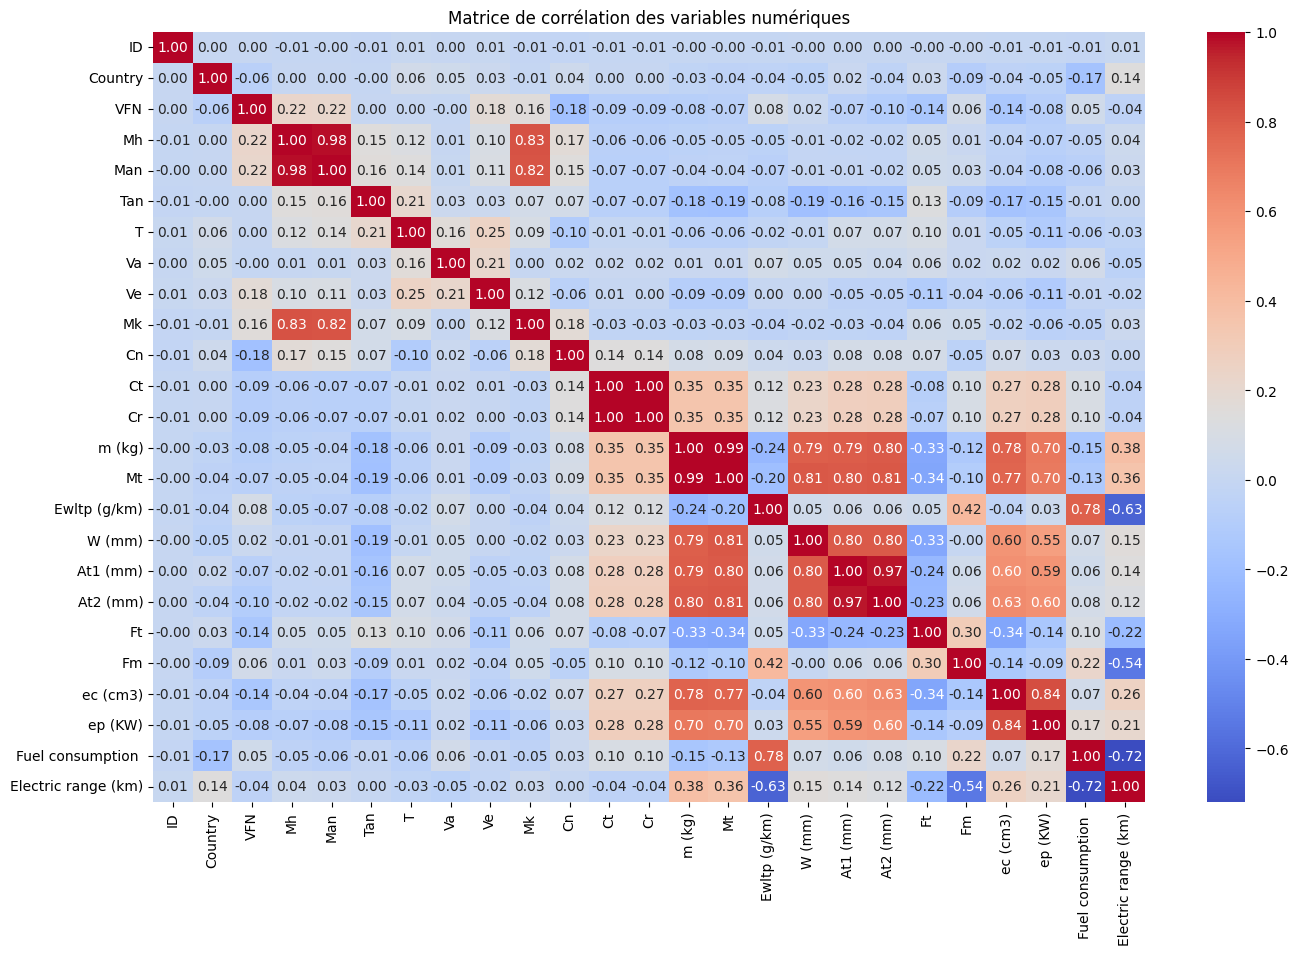

In [24]:
import seaborn as sns
corr = clean_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()


On va garder uniquement les variables avec une corrélation ≥ 0

In [37]:
correlations = clean_train.corr()["Ewltp (g/km)"]
positive_correlations = correlations[abs(correlations) > 0.2].index.tolist()
clean_train_filtered = clean_train[positive_correlations]

In [38]:
clean_train_filtered = clean_train_filtered.drop("")

,m (kg),Mt,Ewltp (g/km),Fm,Fuel consumption,Electric range (km)
0,1387.0,1534.000000,401.053306,3,5.600000,0.0
1,1172.0,1337.000000,394.684459,4,5.500000,0.0
2,1204.0,1335.000000,398.561951,4,5.600000,0.0
3,1438.0,1588.000000,479.470056,4,6.800000,0.0
4,1207.0,1350.000000,421.854820,4,5.900000,0.0
...,...,...,...,...,...,...
7571644,1815.0,2006.000000,481.847421,3,5.900000,0.0
7571645,1815.0,2028.000000,486.397483,3,5.900000,0.0
7571646,1815.0,2006.000000,487.868524,3,5.900000,0.0
7571647,1240.0,1341.530935,350.795221,0,6.200000,0.0


## Etape 2 : application du modèle

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
X = clean_train_filtered.drop("Ewltp (g/km)", axis=1)
y = clean_train_filtered["Ewltp (g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print("split fait")
model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=0)
model.fit(X_train, y_train)
print("fit fait")

split fait
fit fait


In [45]:
y_pred = model.predict(X_test)
print("predict fait")
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

predict fait
Mean Absolute Error: 4.207929104611683


#### en étude : encodage avec target encoding

In [5]:
from sklearn.preprocessing import TargetEncoder

encoder = TargetEncoder()
# clean_train.drop("Country", axis=1,inplace = True)
cat_col = clean_train.select_dtypes(include=['object'])
for col in cat_col:
    clean_train[col] = encoder.fit_transform(clean_train[col].values.reshape(-1,1), clean_train["Ewltp (g/km)"])

In [6]:
clean_train.drop("date", axis = 1, inplace=True)

In [5]:
correlations = clean_train.corr()["Ewltp (g/km)"]
correlations

Unnamed: 0            -0.005190
ID                    -0.005190
Country                0.323100
VFN                    0.982258
Mh                     0.417292
Man                    0.412613
Tan                    0.809170
T                      0.779666
Va                     0.968912
Ve                     0.971111
Mk                     0.406724
Cn                     0.886860
Ct                     0.124876
Cr                     0.124656
m (kg)                -0.236044
Mt                    -0.200176
Ewltp (g/km)           1.000000
W (mm)                 0.053965
At1 (mm)               0.062795
At2 (mm)               0.063215
Ft                     0.897159
Fm                     0.895802
ec (cm3)              -0.038315
ep (KW)                0.033356
Fuel consumption       0.781045
Electric range (km)   -0.630328
Name: Ewltp (g/km), dtype: float64

In [7]:
CORR_THRESHOLD = 0.6
correlations = clean_train.corr()["Ewltp (g/km)"]
positive_correlations = correlations[abs(correlations) > CORR_THRESHOLD].index.tolist()
clean_train_filtered = clean_train[positive_correlations]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
X = clean_train_filtered.drop("Ewltp (g/km)", axis=1)
y = clean_train_filtered["Ewltp (g/km)"]


In [19]:
print(X.columns)

Index(['VFN', 'Tan', 'T', 'Va', 'Ve', 'Cn', 'Ft', 'Fm', 'Fuel consumption ',
       'Electric range (km)'],
      dtype='object')


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("split fait")
model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=0)
model.fit(X_train, y_train)
print("fit fait")

split fait
fit fait


In [ ]:
y_pred = model.predict(X_test)
print("predict fait")
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

predict fait
Mean Absolute Error: 3.1391001105850145


## 3. Utilisation de XGBoost

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
X = clean_train_filtered.drop("Ewltp (g/km)", axis=1)
y = clean_train_filtered["Ewltp (g/km)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

xgboost = GradientBoostingRegressor(n_estimators=100, max_depth=3,random_state=10)
xgboost.fit(X_train,y_train)
print("fit effectué")
y_pred = xgboost.predict(X_test)
print("predict effectué")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {mae}")

fit effectué
predict effectué
MAE = 7.001970672335642


## 4. fonctions 

In [8]:
def encoding(df:pd.DataFrame, encoder:str) -> pd.DataFrame:
  if encoder == "label":
    encoder = LabelEncoder()
    cat_col = df.select_dtypes(include=['object'])
    for col in cat_col:
        df[col] = encoder.fit_transform(df[col])
        df.drop(columns=["date"], inplace=True)

  if encoder == 'target':
    encoder = TargetEncoder()
    cat_col = df.select_dtypes(include=['object'])
    for col in cat_col:
        df[col] = encoder.fit_transform(df[col].values.reshape(-1,1), df["Ewltp (g/km)"])
        df.drop(columns=["date"], axis = 1, inplace=True)
  return df

def feature_selection(df:pd.DataFrame, CORR_THRESHOLD:float) -> pd.DataFrame:
  correlations = df.corr()["Ewltp (g/km)"]
  positive_correlations = correlations[abs(correlations) > CORR_THRESHOLD].index.tolist()
  df_filtered = df[positive_correlations]
  # df_filtered.drop("date", axis = 1, inplace=True)
  return df_filtered

clean_train = encoding(clean_train, "target")
clean_train_filtered = feature_selection(clean_train, 0.6)

In [24]:
from tqdm import tqdm

def model(df:str, model:str(["RF", "XGB"]), N_ESTIMATORS, MAX_DEPTH):

    result_dic = {"model": model,
                  "n_estimators" : N_ESTIMATORS,
                  "max_depth": MAX_DEPTH,
                  "MAE_rf":0}

    X = df.drop("Ewltp (g/km)", axis=1)
    y = df["Ewltp (g/km)"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    if model == "RF" :

        rf_model = RandomForestRegressor(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=19)
        print(f"fit en cours pour le modèle {model}... ⏳")
        n_iterations = 100
        with tqdm(total=n_iterations) as pbar:
            for _ in range(n_iterations):
                rf_model.fit(X_train, y_train)                
                pbar.update(1)

        print("fit terminé ✅")
        print("predict en cours... ⏳")
        y_pred = rf_model.predict(X_test)
        print("predict terminé ✅")
        mae_rf = mean_absolute_error(y_test, y_pred)
        print(f"MAE de la random forest : {mae_rf}")
        result_dic["MAE"].append(mae_rf)

    if model == "XGB" :
        xbg_model = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH,random_state=19)
        print(f"fit en cours pour le modèle {model}... ⏳")
        n_iterations = 100
        with tqdm(total=n_iterations) as pbar:
            for _ in range(n_iterations):
                xbg_model.fit(X_train, y_train)                
                pbar.update(1)
        # tqdm(xbg_model.fit(X_train,y_train))
        print("fit terminé ✅")
        print("predict en cours... ⏳")
        y_pred = xbg_model.predict(X_test)
        print("predict terminé ✅")
        mae_xgb = mean_absolute_error(y_test, y_pred)
        print(f"MAE de XG Boost : {mae_xgb}")
        result_dic["MAE_xgb"].append(mae_rf)
    
    return result_dic

model(clean_train_filtered, "RF", 100,20)
    

fit en cours pour le modèle RF... ⏳


  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:

def model(df:pd.DataFrame, model_type:str, N_ESTIMATORS:int, MAX_DEPTH:int) -> dict:
    result_dic = {"model": model_type, "n_estimators": N_ESTIMATORS, "max_depth": MAX_DEPTH, "MAE_rf": 0,
                "MAE_xgb":0}

    X = df.drop("Ewltp (g/km)", axis=1)
    y = df["Ewltp (g/km)"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    if model_type == "RF":
        rf_model = RandomForestRegressor(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=19)
        print(f"Fit en cours pour le modèle {model_type}... ⏳")

        rf_model.fit(X_train, y_train)
        print("Fit terminé ✅")
        print("Predict en cours... ⏳")
        y_pred = rf_model.predict(X_test)
        print("Predict terminé ✅")
        mae_rf = mean_absolute_error(y_test, y_pred)
        print(f"MAE de la random forest : {mae_rf}")
        result_dic["MAE_rf"] = mae_rf

    if model_type == "XGB":
        xgb_model = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=19)
        print(f"Fit en cours pour le modèle {model_type}... ⏳")
        xgb_model.fit(X_train, y_train)
        print("Fit terminé ✅")
        print("Predict en cours... ⏳")
        y_pred = xgb_model.predict(X_test)
        print("Predict terminé ✅")
        mae_xgb = mean_absolute_error(y_test, y_pred)
        print(f"MAE de XG Boost : {mae_xgb}")
        result_dic["MAE_xgb"] = mae_xgb

    return result_dic

result_rf = model(clean_train_filtered, "RF", 25, 20)
# result_xgb = model(clean_train_filtered, "XGB", 100, 20)
result_rf

Fit en cours pour le modèle RF... ⏳


  2%|▏         | 2/100 [1:38:43<80:37:38, 2961.82s/it]


KeyboardInterrupt: 